In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import inconsistent
from scipy.spatial.distance import pdist

In [2]:
df = pd.read_csv('kaggle_Interests_group.csv')
df

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
6336,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6337,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6338,I,38,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN


## Обработка пропущенных значений и кодинг переменных

In [3]:
#Обнаруживаем переменные, где Nan - это значения
columns = []
for i in df.columns:
    if df[i].nunique() < 2:
        print(i, '\n', df[i].isnull().sum())
        columns.append(i)

interest1 
 5347
interest2 
 6339
interest3 
 6305
interest4 
 6315
interest7 
 6339
interest8 
 6247
interest10 
 6339
interest11 
 6165
interest13 
 6322
interest14 
 5975
interest15 
 4448
interest17 
 6003
interest18 
 6338
interest19 
 6199
interest20 
 6175
interest22 
 5912
interest23 
 6285
interest24 
 6285
interest25 
 6323
interest26 
 6322
interest27 
 6338
interest28 
 6301
interest29 
 6205
interest30 
 6208
interest31 
 6339
interest32 
 6274
interest33 
 6036
interest34 
 6339
interest35 
 6337
interest36 
 6332
interest38 
 6273
interest39 
 6330
interest41 
 5692
interest42 
 6219
interest44 
 4978
interest45 
 6302
interest46 
 6251
interest49 
 5876
interest51 
 5560
interest52 
 4125
interest53 
 6331
interest54 
 5607
interest55 
 6230
interest56 
 6329
interest60 
 5773
interest65 
 5076
interest67 
 6274
interest68 
 6325
interest69 
 6302
interest72 
 6040
interest73 
 6332
interest74 
 6090
interest75 
 6332
interest76 
 6339
interest77 
 5814
interest82 
 561

In [4]:
df[columns] = df[columns].fillna(3)

In [5]:
columns_for_mode = [i for i in df.columns if i not in columns]

In [6]:
for i in columns_for_mode:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [7]:
df

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
1,C,43,1.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
2,C,27,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
3,C,34,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
4,C,36,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
6336,I,48,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
6337,I,48,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
6338,I,38,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0


In [8]:
df['group'].unique()

array(['C', 'P', 'R', 'I'], dtype=object)

In [9]:
df['group'] = df['group'].map({'C': 1, 'P': 2, 'R': 3, 'I': 4})

## Стандартизиция данных

У переменной grand_tot_interests будет явны перевес во время работы алгоритма. Стандартизирую его.

In [10]:
scaler = StandardScaler()
scaler.fit(df)

df['grand_tot_interests'] = scaler.transform(df)
df

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,1,-1.257158,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
1,1,-1.257158,1.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
2,1,-1.257158,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
3,1,-1.257158,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
4,1,-1.257158,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,4,1.311723,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
6336,4,1.311723,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
6337,4,1.311723,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0
6338,4,1.311723,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0


## Снижение размерности

Слишком большое количество признаков порождает проклятие размерности. Миную его с помощью уменьшения размерности алгоритма PCA

In [11]:
#Подготавливаю данные для визуализации и оценки количества кластеров
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(df)
X_embedded.shape

(6340, 2)

In [12]:
X_embedded = pd.DataFrame(X_embedded, columns=['x', 'y'])

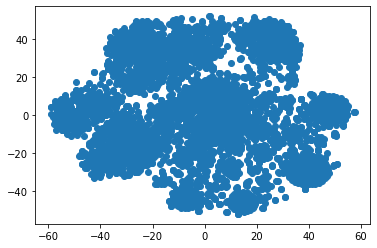

In [13]:
# Встаёт дилемма: выбрать пару больших кластеров или разбить на маленькие?
plt.scatter(X_embedded['x'], X_embedded['y'])

In [14]:
# Посмотрим на silhouette по KMeans
avg = []
ssd = []
for i in range(2, 10):
    Kmeans = KMeans(n_clusters=i, random_state=42, max_iter=60)
    Kmeans.fit(df)
    y_labels = Kmeans.labels_
    
    silhouette_avg = silhouette_score(df, y_labels)
    
    avg.append(silhouette_avg)
    ssd.append(Kmeans.inertia_)
#На сырых данных оптимально - это 2 кластера
pd.DataFrame(avg, columns=['silhouette'])

,silhouette
0,0.132433
1,0.104524
2,0.098332
3,0.059189
4,0.054448
5,0.053767
6,0.058815
7,0.058941


In [15]:
#Снижаем размерность данных
pca = PCA(n_components=200).fit(df)
new_df = pca.transform(df)
var_exp = pca.explained_variance_ratio_
#x_new = pd.DataFrame(x_new, columns=['x', 'y'])

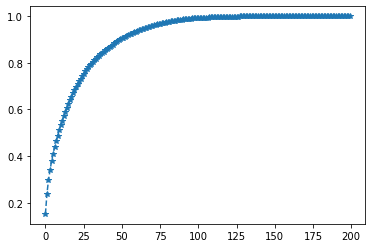

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '*--')

In [17]:
# Достаточное количество дисперсии в 30 фич
pca = PCA(n_components=30).fit(df)
new_df = pca.transform(df)

In [18]:
#Проверяем изменение метрики
avg = []
ssd = []
for i in range(2, 20):
    Kmeans = KMeans(n_clusters=i, random_state=42, max_iter=60)
    Kmeans.fit(new_df)
    y_labels = Kmeans.labels_
    
    silhouette_avg = silhouette_score(new_df, y_labels)
    
    avg.append(silhouette_avg)
    ssd.append(Kmeans.inertia_)
    
pd.DataFrame(avg, columns=['silhouette'])

,silhouette
0,0.159904
1,0.130123
2,0.129277
3,0.094234
4,0.095422
5,0.099111
6,0.098454
7,0.102256
8,0.067314
9,0.101955


При уменешении количества фичей, качество метрики повышается. Лучшее количество кластеров - 2, однако, если судить по визуализации, лучше 7 кластеров. Людей логичнее разделить на классы побольше.

## Построение алгоритмов

### KMeans

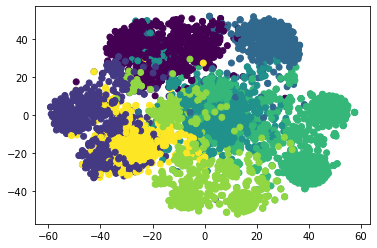

In [19]:
#Как мы уже разобрались - лучше взять 7 кластеров
Kmeans = KMeans(n_clusters=7, random_state=42, max_iter=60)
Kmeans.fit(new_df)
y_labels = Kmeans.labels_

df_kmeans = X_embedded.copy()
df_kmeans['labels'] = y_labels

#во многих местах данные накладываются, но это терпимо.
plt.scatter(X_embedded['x'], X_embedded['y'], c=df_kmeans['labels'])

### Hierarchy

In [20]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = hierarchy.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

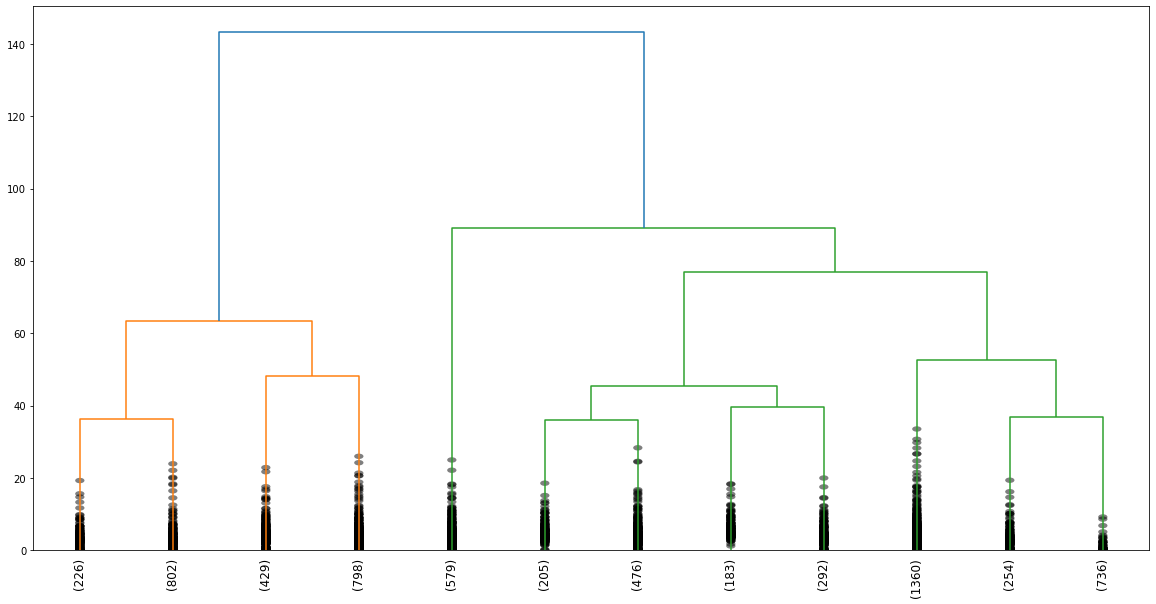

In [21]:
distance_mat = pdist(new_df) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'ward') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True)

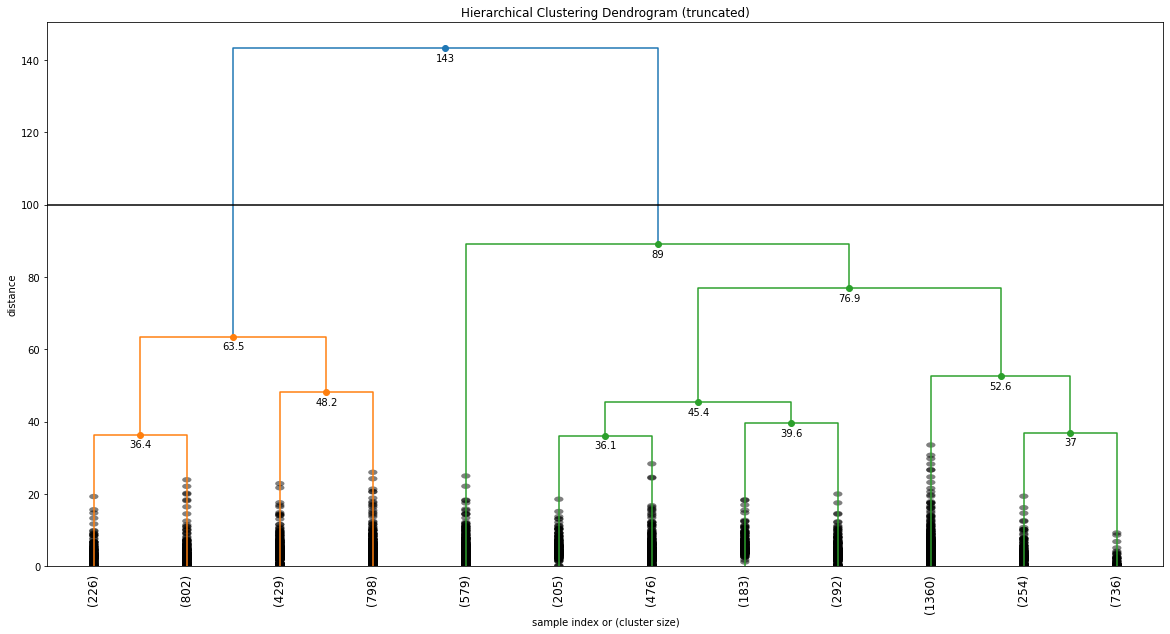

In [22]:
#в случае с деревом проведу разделение на 2 кластера
max_d = 100
plt.figure(figsize=(20, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [23]:
from scipy.cluster.hierarchy import fcluster
max_d = 100
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, ..., 1, 1, 2], dtype=int32)

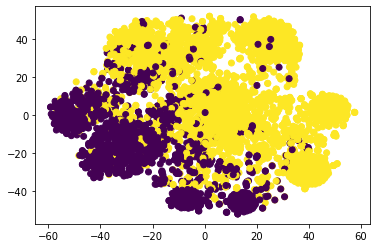

In [24]:
df_hi = X_embedded.copy()
df_hi['labels'] = clusters

#При 2-х кластеров выбросов довольно, но разделение имеет место быть.
plt.scatter(df_hi['x'], df_hi['y'], c=df_hi['labels'])

In [25]:
# загружаю обе модели в csv
h_model = df.copy()
h_model['H_cluster'] = clusters
h_model['KM_cluster'] = y_labels

h_model.to_csv('interes_group_model.csv')